# Fourierove vrste

Cilj Fourierovih vrst je, da bi poljubne (periodične) podatke opisali z vsoto harmonskih funkcij različnih osnovnih period. Ta cilj je v tem trenutku definiran relativno površno; vse detajle bomo pogledali v tem poglavju. Pot nas bo vodila preko sledečih korakov:

1. zapis periodične funkcije, kot vsote harmonskih funkcij 
1. identifikacija harmonskih funkcij iz točke 1.
1. posplošitev


To poglavje je napisano na podlagi večjega števila virov in lastnega raziskovanja. Med knjižnjimi viri bralcu priporočam {cite:t}`shin2008`, med video vsebinami pa [Grant Sanderson: But what is a Fourier series? From heat flow to drawing with circles]( https://www.youtube.com/watch?v=r6sGWTCMz2k).


## Zapis periodične funkcije, kot vsote harmonskih funkcij

Preden gremo v podrobnosti Fourierovih vrst, si pogljemo definicijo splošne harmonske funkcije:

$$
x(t) = X\,\sin(\omega\,t+\varphi),
$$

kjer je $X$ amplituda, $\omega$ krožna frekvenca (enota: rad/s) in $\varphi$ fazni kot (enota rad) glede na izhodišče časa. Pri tem je $\omega=2\,\pi\,f$ in je $f$ (sekundna) frekvenca (enota: 1/s=Hz). Pozitivna faza pomakne harmonsko funkcijo proti levi, negativna faza pa proti desni. Perioda $T$, ko se harmonska funkcija ponovi je definirana z krožno frekvenco: $T=2\,\pi/\omega$.

Primer harmonske funkcije z amplitudo $X=1$, krožno frekvenco $\omega=1\,$rad/s in pozitivno fazo $\varphi=1\,$rad je prikazan spodaj.

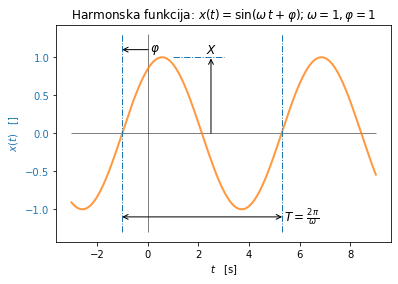

In [1]:
import numpy as np
import matplotlib.pyplot as plt


T = 6
X = 1
t, dt = np.linspace(-0.5*T,1.5*T,201, retstep=True)
ω = 1
ϕ = 1

fig, ax1 = plt.subplots()
plt.title(f'Harmonska funkcija: $x(t) = \sin(\\omega\,t+\\varphi); \\omega={ω}, \\varphi={ϕ}$ ')

ax1.set_xlabel('$t\\quad $[s]')
ax1.set_ylabel('$x(t)\quad$[]', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')
ax1.vlines(0, -1.3, 1.3, 'k', lw=0.5)
ax1.hlines(0, np.min(t), np.max(t), 'k', lw=0.5)
ax1.plot(t, X*np.sin(ω*t+ϕ), label='Harmonski podatki', c='C1', lw=2, alpha=0.8) 
ax1.vlines(-ϕ+2*np.pi*np.arange(T/(ω*2*np.pi)+1), -1.3, 1.3, ls='-.', lw=1)
ax1.annotate('$\\varphi$',
            xy=(-ϕ, 1.1), xycoords='data',
            va='center', size='large',
            xytext=(0.1, 1.1), textcoords='data',
            arrowprops=dict(arrowstyle='->',
                            connectionstyle='arc3,rad=0',
                            color="k", shrinkA=0, shrinkB=0),
            )
ax1.hlines(X, 1., 3, ls='-.', lw=1)
ax1.annotate('$X$',
            xy=(2.5, 0), xycoords='data',
            ha='center', size='large',
            xytext=(2.5, X+.05), textcoords='data',
            arrowprops=dict(arrowstyle='<-',
                            connectionstyle='arc3,rad=0',
                            color="k", shrinkA=0, shrinkB=0),
            )
ax1.annotate('$T=\\frac{2\,\pi}{\\omega}$',
            xy=(-ϕ, -1.1), xycoords='data',
            va='center', size='large', 
            xytext=(2*np.pi-ϕ+0.1, -1.1), textcoords='data',
            arrowprops=dict(arrowstyle='<->',
                            connectionstyle='arc3,rad=0',
                            color="k", shrinkA=0, shrinkB=0),
            )
plt.show()

Potem, ko smo podrobneje spoznali eno harmonsko funkcijo, nadaljujemo s vsoto harmonskih funkcij, pri tem se bomo omejili na kompleksno periodične podatke (glejte {ref}`sec:klasifikacija_pod`), kjer je razmerje med frekvencami posameznih harmonikov racionalno število. Frekvence harmonskih funkcij bomo dodatno omejili: če je osnovna krožna frekvenca $\omega_p=2\,\pi/T_p$ definirana z osnovno periodo $T_p$, potem bomo za vse ostale harmonike zahtevali, da imajo krožno frekvenco, ki je večkratnik osnovne krožne frekvence.

Opisu ustreza vsota harmonskih funkcij:

$$
x(t)=\frac{a_0}{2}+\sum_{n=1}^{\infty}
\left[
a_n\cos\left(\frac{2\,\pi\,n\,t}{T_p} \right)
+
b_n\sin\left(\frac{2\,\pi\,n\,t}{T_p} \right)
\right],
$$

kjer je $a_0$ konstanta, $a_n$ amplituda $n$-te kosinusne komponente in $b_n$ amplituda $n$-te sinusne komponente.

Spodaj si poglejmo primer harmonske funkcije, ki ustreza zgornjim omejitvam.

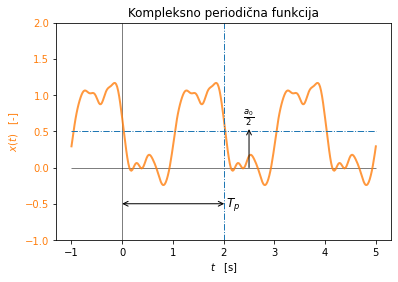

In [2]:
import numpy as np
import matplotlib.pyplot as plt


Tp = 2
t, dt = np.linspace(-0.5*Tp,2.5*Tp,301, retstep=True)
a0 = 1.
N = 10
seed = 0
rg = np.random.default_rng(seed)
a = rg.normal(size=N)*1/np.arange(1,N+1)**2 #skaliranje na koncu, da imajo višje komponente imajo manjšo amplitudo
b = rg.normal(size=N)*1/np.arange(1,N+1)**2
x = a0/2
for n in range(N):
    x += a[n]*np.cos(2*np.pi*(n+1)*t/Tp) + b[n]*np.sin(2*np.pi*(n+1)*t/Tp)

fig, ax1 = plt.subplots()
plt.title(f'Kompleksno periodična funkcija')

ax1.set_xlabel('$t\\quad $[s]')
ax1.set_ylabel('$x(t)\quad$[-]', color='C1')
ax1.tick_params(axis='y', labelcolor='C1')
ax1.vlines(0, -2, 2, 'k', lw=0.5)
ax1.hlines(0, np.min(t), np.max(t), 'k', lw=0.5)
ax1.plot(t, x, label='Periodični podatki', c='C1', lw=2, alpha=0.8) 
ax1.vlines([Tp], -2, 2, ls='-.', lw=1)
ax1.hlines(a0/2, np.min(t), np.max(t), ls='-.', lw=1)
ax1.annotate('$\\frac{a_0}{2}$',
            xy=(2.5, 0), xycoords='data',
            ha='center', size='large',
            xytext=(2.5, a0/2+.15), textcoords='data',
            arrowprops=dict(arrowstyle='<-',
                            connectionstyle='arc3,rad=0',
                            color="k", shrinkA=0, shrinkB=0),
            )
ax1.annotate('$T_{p}$',
            xy=(0, -0.5), xycoords='data',
            va='center', size='large', 
            xytext=(Tp+0.05, -0.5), textcoords='data',
            arrowprops=dict(arrowstyle='<->',
                            connectionstyle='arc3,rad=0',
                            color="k", shrinkA=0, shrinkB=0),
            )
plt.ylim(-1,2)
plt.show()

Periodična funkcija kakor smo si jo pogledali zgoraj je ključnega pomena za razumevanje Fourierovih vrst in pozneje Fourierove transformacije (poglavje TBA). V nadaljevanju bomo periodično funkcijo najprej preoblikovali v kompleksno obliko, saj nam bo to zelo poenostavilo matematični zapis in fizikalno jasnost.

Zapis v kompleksno obliko začnemo s pomočjo Eulerjeve formule:

$$
e^{\mathrm{i}\,\alpha} = \cos\alpha + \mathrm{i}\,\sin\alpha,
$$

kjer je $\mathrm{i}=\sqrt{-1}$. 

Če uporabimo $\alpha=2\,\pi\,n\,t/T_p$, lahko zapišemo:

$$
\cos\alpha=\frac{1}{2}e^{\mathrm{i}\,\alpha}+\frac{1}{2}e^{-\mathrm{i}\,\alpha}
\qquad
\sin\alpha=-\frac{1}{2}\,\mathrm{i}\,e^{\mathrm{i}\,\alpha}+\frac{1}{2}\,\mathrm{i}\,e^{-\mathrm{i}\,\alpha}
$$

ter funkcijo:

$$
x(t)=\frac{a_0}{2}+\sum_{n=1}^{\infty}
\left[
a_n\cos\big(\frac{2\,\pi\,n\,t}{T_p} \big)
+
b_n\sin\big(\frac{2\,\pi\,n\,t}{T_p} \big)
\right],
$$

preoblikujemo v:

$$
x(t)=\frac{a_0}{2}+\sum_{n=1}^{\infty}
\left[
a_n\big( 
\frac{1}{2}e^{\mathrm{i}\,\alpha}+\frac{1}{2}e^{-\mathrm{i}\,\alpha}
\big)+
b_n\big( 
-\frac{1}{2}\,\mathrm{i}\,e^{\mathrm{i}\,\alpha}+\frac{1}{2}\,\mathrm{i}\,e^{-\mathrm{i}\,\alpha}
\big)
\right].
$$

Urejamo naprej:

$$
x(t)=\frac{a_0}{2}+\sum_{n=1}^{\infty}
\left[
\big( 
\frac{1}{2}a_n-\frac{1}{2}\mathrm{i}b_n
\big)\,e^{\mathrm{i}\,2\,\pi\,n\,t/T_p}+
\right]
+\sum_{n=1}^{\infty}
\left[
\big( 
\frac{1}{2}a_n+\frac{1}{2}\mathrm{i}b_n
\big)\,e^{-\mathrm{i}\,2\,\pi\,n\,t/T_p}+
\right].
$$

Zgornjo enačbo lahko poenostavimo v:

$$
x(t)=\sum_{n=-\infty}^{\infty}
X_n\,e^{\mathrm{i}\,2\pi\,n\,t/T_p},
$$

kjer velja:

$$
X_n = 
\begin{cases}
    \frac{1}{2}a_n-\frac{1}{2}\textrm{i}b_n,& \text{če } n\geq +1\\
    \frac{1}{2}a_n,              & \text{če } n = 0\\
    \frac{1}{2}a_{|n|}+\frac{1}{2}\textrm{i}b_{|n|},& \text{če } n\leq -1\\
\end{cases}
$$

Ugotovimo, da velja $X_n=X_{-n}^{*}$, kjer smo z ${}^*$ označili kompleksno konjugirano vrednost.

Da obe definiciji, klasična:

$$x(t)=\frac{a_0}{2}+\sum_{n=1}^{\infty}
\left[
a_n\cos\left(\frac{2\,\pi\,n\,t}{T_p} \right)
+
b_n\sin\left(\frac{2\,\pi\,n\,t}{T_p} \right)
\right]
$$

in zapis v kompleksni obliki:

$$
x(t)=\sum_{n=-\infty}^{\infty}
X_n\,e^{\mathrm{i}\,2\pi\,n\,t/T_p},
$$

vodita v isti rezultat se lahko prepričamo iz slike spodaj.

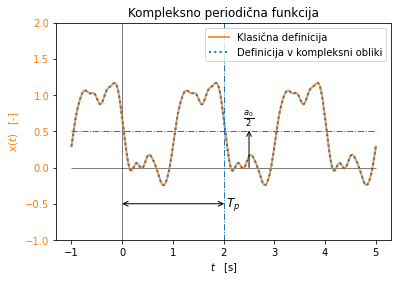

In [3]:
import numpy as np
import matplotlib.pyplot as plt


Tp = 2
t, dt = np.linspace(-0.5*Tp,2.5*Tp,301, retstep=True)
a0 = 1.
N = 10
seed = 0
rg = np.random.default_rng(seed)
a = rg.normal(size=N)*1/np.arange(1,N+1)**2 #skaliranje na koncu, da imajo višje komponente imajo manjšo amplitudo
b = rg.normal(size=N)*1/np.arange(1,N+1)**2

X = np.zeros(2*N+1, dtype='complex')
X[N+1:] = 0.5*a-0.5j*b
X[N] = a0/2
X[:N] = np.conj(X[N+1:])[::-1]

x1 = a0/2
for n in range(N):
    x1 += a[n]*np.cos(2*np.pi*(n+1)*t/Tp) + b[n]*np.sin(2*np.pi*(n+1)*t/Tp)

x = np.zeros(len(t), 'complex')
for n in range(-N,N+1):
    x += X[N+n]*np.exp(2j*np.pi*n*t/Tp)
x = np.real(x) # teoretično pričakujemo samo realno rezultat (imaginarni del mora biti na nivoju numerične napake)
    
fig, ax1 = plt.subplots()
plt.title(f'Kompleksno periodična funkcija')

ax1.set_xlabel('$t\\quad $[s]')
ax1.set_ylabel('$x(t)\quad$[-]', color='C1')
ax1.tick_params(axis='y', labelcolor='C1')
ax1.vlines(0, -2, 2, 'k', lw=0.5)
ax1.hlines(0, np.min(t), np.max(t), 'k', lw=0.5)
ax1.plot(t, x1, label='Klasična definicija', c='C1', lw=2, alpha=0.8) 
ax1.plot(t, x, label='Definicija v kompleksni obliki', c='C0', ls=':', lw=2, alpha=1) 
ax1.vlines([Tp], -2, 2, ls='-.', lw=1)
ax1.hlines(a0/2, np.min(t), np.max(t), ls='-.', lw=1)
ax1.annotate('$\\frac{a_0}{2}$',
            xy=(2.5, 0), xycoords='data',
            ha='center', size='large',
            xytext=(2.5, a0/2+.13), textcoords='data',
            arrowprops=dict(arrowstyle='<-',
                            connectionstyle='arc3,rad=0',
                            color="k", shrinkA=0, shrinkB=0),
            )
ax1.annotate('$T_{p}$',
            xy=(0, -0.5), xycoords='data',
            va='center', size='large', 
            xytext=(Tp+0.05, -0.5), textcoords='data',
            arrowprops=dict(arrowstyle='<->',
                            connectionstyle='arc3,rad=0',
                            color="k", shrinkA=0, shrinkB=0),
            )
ax1.legend(loc=1)
plt.ylim(-1,2)
plt.show()

## Identifikacija harmonskih funkcij, ki sestavljajo periodično funkcijo

Sedaj se lahko vrnemo na izvorno nalogo Fourierovih vrst: *popis poljubne periodične funkcije s superpozicijo različnih harmonskih funkcij*. Vprašanje torej je, ali v periodični funkciji:

$$
x(t)=\sum_{n=-\infty}^{\infty}
X_n\,e^{\mathrm{i}\,2\pi\,n\,t/T_p},\qquad X_n=X_{-n}^*
$$

lahko identificiramo harmonsko funkcijo s frekvenco $m$ kratnika osnovne frekvence, torej  $X_m\,e^{\mathrm{i}\,2\pi\,m\,t/T_p}$? Izkaže se, da je to relativno enostavno, če poskušamo izračunati integral periodične funkcije $x(t)$ pomnožen z enotsko harmonsko funkcijo  $e^{-\mathrm{i}\,2\pi\,m\,t/T_p}$, negativne frekvence $-m/T_p$ (namesto $\textrm{i}$, imamo v eksponentu $\textrm{-i}$):

$$
\underbrace{\int_0^{T_p} x(t)\,e^{-\mathrm{i}\,2\pi\,m\,t/T_p}\,\mathrm{d}t}_{A_m}=
\underbrace{\int_0^{T_p} \sum_{n=-\infty}^{\infty}
X_n\,e^{\mathrm{i}\,2\pi\,n\,t/T_p} \,\,e^{-\mathrm{i}\,2\pi\,m\,t/T_p}\,\mathrm{d}t}_{B_m}
$$

Ker $x(t)$ predstavlja znano periodično funkcijo (oz. podatke), lahko integral $A_m$ izračunamo. $B_m$ pa lahko poenostavimo v:

$$
B_m=\int_0^{T_p} \sum_{n=-\infty}^{\infty}
X_n\,e^{\mathrm{i}\,2\pi\,(n-m)\,t/T_p} \,\mathrm{d}t
$$

Zamenjajmo sedaj vrstni red seštevanja in integriranja, ter izpostavimo konstanto $X_n$:

$$
B_m= \sum_{n=-\infty}^{\infty}
X_n\,\int_0^{T_p}e^{\mathrm{i}\,2\pi\,(n-m)\,t/T_p} \,\mathrm{d}t
$$

Ker integriramo harmonsko funkcijo s frekvenco, ki je celi večkratnik osnovne frekvence $1/T_p$, je rezultat vedno 0, razen takrat, ko je $n=m$:

$$
\int_0^{T_p}e^{\mathrm{i}\,2\pi\,(n-m)\,t/T_p} \,\mathrm{d}t=
\begin{cases}
    0,& \text{če } n\ne m\\
    T_p,& \text{če } n= m\\
\end{cases}
$$

Sledi torej:
$$
B_m = X_m\,T_p
$$


Ker velja $A_m=B_m$ sledi, da je neznana kompleksna amplituda $X_m$ definirana kot (kompleksna amplituda definira amplitudo in fazo):

$$
X_m = \frac{A_m}{T_p} = \frac{1}{T_p}\,\int_0^{T_p} x(t)\,e^{-\mathrm{i}\,2\pi\,m\,t/T_p}\,\mathrm{d}t
$$

Izpeljali smo torej, da je posamezno harmonsko komponento relativno enostavno določiti; težava v praksi je, da dani podatki $x(t)$ nujno ne izpolnjujejo vseh predpostavk, ki smo jih zgoraj naredili. Kljub temu, pa Fourierove vrste uporabljamo in nam dajejo odlične rezultate. Več si pogledamo v nadaljevanju.

## Posplošitev

Fourierove vrste najpogosteje najdemo definirane v treh oblikah ($T_p$ predstavlja osnovno period in $N$ število harmonskih komponent, ki jih upoštevamo/identificiramo):

(sec:FV_exp)=

### Fourierove vrste v eksponentni (kompleksni) obliki

$$
X_n = \frac{1}{T_p}\,\int_0^{T_p} x(t)\,e^{-\mathrm{i}\,2\pi\,n\,t/T_p}\,\mathrm{d}t
$$

$$
x(t)=\sum_{n=-N}^{N}
X_n\,e^{\mathrm{i}\,2\pi\,n\,t/T_p},\qquad X_n=X_{-n}^*
$$


(sec:FV_sin_cos)=

### Fourierove vrste v sinus-kosinusni obliki

$$
a_n = \frac{1}{T_p}\,\int_0^{T_p} x(t)\,\cos(2\pi\,n\,t/T_p)\,\mathrm{d}t
$$

$$
b_n = \frac{1}{T_p}\,\int_0^{T_p} x(t)\,\sin(2\pi\,n\,t/T_p)\,\mathrm{d}t
$$

$$
x(t)=\frac{a_0}{2}+\sum_{n=1}^{N}
a_n\,\sin(2\pi\,n\,t/T_p)+
b_n\,\cos(2\pi\,n\,t/T_p)
$$


### Fourierove vrste v amplitudno-fazni obliki

$$
x(t)=\frac{A_0}{2}+\sum_{n=1}^{N}
A_n\,\cos(2\pi\,n\,t/T_p-\varphi_n)$$

Kjer moramo amplitudo $A_n$ in fazo $\varphi_n$ določit s pomočjo eksponentne ali sinusno-kosinusne oblike in ob pomoči prehodov med posameznimi oblikami zapisov:

$$
\begin{split}
X_0&=A_0&=a_0\\
X_n&=\frac{A_n}{2}\,e^{-\mathrm{i}\varphi_n}&=\frac{1}{2}(a_n-\mathrm{i}b_n)\\
X_n&=X_{-n}^*&\\
\end{split}
$$

V tej knjigi bomo skoraj izključno uporabljali eksponentno obliko, saj je najbolj kompaktna, enostavna za uporabo in matematične izpeljave. 

### Nekatere lastnosti Fourierovih vrst

#### Odvodi in integrali Fourierovih vrst

#### Fourirove vrste lihih in sodih funkcij

Funkcija $x(t)$ je **soda**, če velja:

$$
x(-t)=x(t),
$$
takrat velja tudi:

$$
\int_a^a x(t)\,\mathrm{d}t=0.
$$

Funkcija je **liha**, če velja:

$$
x(-t)=-x(t),
$$
takrat velja tudi
$$
\int_a^a x(t)\mathrm{d}t=2\,\int_0^a x(t)\,\mathrm{d}t.
$$

Izostavimo lahko da je funkcija $\cos()$ soda, funkcija $\sin()$ pa liha. 

Za poznejšo obravnavo bo pomemben produkt dveh funkcij (ko npr. pri izračunu koeficientov Fourierove vrste); ali je produkt  funkcij $x(t)\,y(t)$ sodi ali lihi, je odvisno od sodosti in lihosti funkcij $x(t)$ in $y(t)$. Odnosi so definirani v tabeli spodaj.

| če $x(t)$ | če $y(t)$ | je rezultat $x(t)\,y(t)$|
|:-|-:|:-:|
| liha  | liha  | *soda*  |
| liha  | soda  | *liha*  |
| soda  | liha  | *liha*  |
| soda  | soda  | *soda*  |

Glede na zgornjo tabelo lahko sklenemo (glejte tudi {ref}`sec:FV_sin_cos`):
* če iščemo Fourierovo vrsto *sode* peridične funkcije $x(t)$, potem bodo kosinusni členi $a_n$ enaki nič (ker je produkt sode in sode funkcije soda funkcija; integral sode funkcije pa je 0).
* če iščemo Fourierovo vrsto *lihe* peridične funkcije $x(t)$, potem bodo sinusni členi $b_n$ enaki nič (ker je produkt lihe in lihe funkcije soda funkcija; integral sode funkcije pa je 0).


## Nekateri zgledi

### Kompleksno periodična funkcija 

Najprej si bomo pogledali kompleksno periodično funkcijo, ki smo jo spoznali in definirali že zgoraj. Funkcija je definirana z $N=10$ harmonskimi komponentami $X_n$, ki so v spodnjem primeru znane; tukaj bomo pokazali, da nas uporaba zgoraj definiranih enačb vodi v točno identifikacijo le-teh.

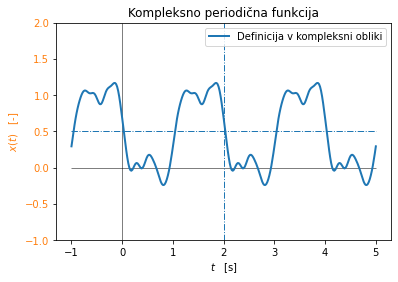

In [4]:
import numpy as np
import matplotlib.pyplot as plt


Tp = 2
t, dt = np.linspace(-0.5*Tp,2.5*Tp,301, retstep=True)
a0 = 1.
N = 10
seed = 0
rg = np.random.default_rng(seed)
a = rg.normal(size=N)*1/np.arange(1,N+1)**2 #skaliranje na koncu, da imajo višje komponente imajo manjšo amplitudo
b = rg.normal(size=N)*1/np.arange(1,N+1)**2

X = np.zeros(2*N+1, dtype='complex')
X[N+1:] = 0.5*a-0.5j*b
X[N] = a0/2
X[:N] = np.conj(X[N+1:])[::-1]

x = np.zeros(len(t), 'complex')
for n in range(-N,N+1):
    x += X[N+n]*np.exp(2j*np.pi*n*t/Tp)
x = np.real(x) # teoretično pričakujemo samo realno rezultat (imaginarni del mora biti na nivoju numerične napake)
    

fig, ax1 = plt.subplots()
plt.title(f'Kompleksno periodična funkcija')

ax1.set_xlabel('$t\\quad $[s]')
ax1.set_ylabel('$x(t)\quad$[-]', color='C1')
ax1.tick_params(axis='y', labelcolor='C1')
ax1.vlines(0, -2, 2, 'k', lw=0.5)
ax1.hlines(0, np.min(t), np.max(t), 'k', lw=0.5)
ax1.plot(t, x, label='Definicija v kompleksni obliki', c='C0', lw=2, alpha=1) 
ax1.vlines([Tp], -2, 2, ls='-.', lw=1)
ax1.hlines(a0/2, np.min(t), np.max(t), ls='-.', lw=1)
ax1.legend(loc=1)
plt.ylim(-1,2)
plt.show()

V primeru zgoraj je peridočna funkcija generirana na podlagi vektorja kompleksnih amplitud:

In [5]:
X

array([-0.00632711+0.00521257j, -0.00434404+0.00254093j,
        0.00739907-0.00247109j,  0.01330612-0.00555366j,
        0.00502215-0.01017038j, -0.01071339-0.02491822j,
        0.00327813-0.00683724j,  0.03557904-0.12916838j,
       -0.01651311+0.00516575j,  0.06286511-0.31163723j,
        0.5       +0.j        ,  0.06286511+0.31163723j,
       -0.01651311-0.00516575j,  0.03557904+0.12916838j,
        0.00327813+0.00683724j, -0.01071339+0.02491822j,
        0.00502215+0.01017038j,  0.01330612+0.00555366j,
        0.00739907+0.00247109j, -0.00434404-0.00254093j,
       -0.00632711-0.00521257j])

Opazimo, da je vektor kompleksno konjugiran okoli središčnega elementa. Poljubni element lahko zgolj na podlagi časovne vrste $x(t)$ določimo tako, da sledimo definiciji:

$$
X_n = \frac{1}{T_p}\,\int_0^{T_p} x(t)\,e^{-\mathrm{i}\,2\pi\,n\,t/T_p}\,\mathrm{d}t
$$

kar je v numerični implementaciji (za `n=1`):

In [6]:
n=1 # poskusite še druge vrednosti, tudi n>N!
sel = np.logical_and(t>=0, t<=Tp)
np.trapz(x[sel]*np.exp(-2j*np.pi*n*t[sel]/Tp), dx=dt)/Tp

(0.06286511054669663+0.3116372312686761j)

Pri tem smo pazili, da smo izbrali (`sel`) samo eno periodo v časovni vrsti. Tukaj velja poudariti, da moramo integrirati po celotni periodi. Rezultat je **točen** do nivoja natančnosti zapisa v računalnik.

Vredno je opozoriti, da moramo biti zelo natančni pri implementaciji izpeljanih izrazov. Hitro lahko dobimo *zelo dober* rezultat; vendar dokler ni *točen* do nivoja natančnosti zapisa v računalnik, do takrat je nekje napaka. 

Napako bi lahko naredili, če bi naša diskretizacija bila takšna, da ne bi ključevala točke pri 0s in točke pri $T_p$. Tako napako lahko preikusite tako, greste par vrstic navzgor v definicijo slike in vrstico:
```python
t, dt = np.linspace(-0.5*Tp,2.5*Tp,301, retstep=True)
```
spremenite v (301 v 300):
```python
t, dt = np.linspace(-0.5*Tp,2.5*Tp,300, retstep=True)
```

### Periodična funkcija

Tukaj si bomo pogledali periodično funkcijo, ki pa ni kompleksno harmonska. Primer takšne funkcije je naraščajoča žaga prikazana na spodnji sliki. 

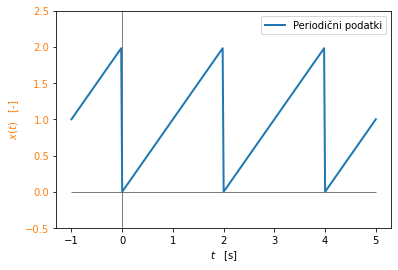

In [7]:
import numpy as np
import matplotlib.pyplot as plt


Tp = 2
t, dt = np.linspace(-0.5*Tp,2.5*Tp,301, retstep=True)
x = t%Tp

fig, ax1 = plt.subplots()

ax1.set_xlabel('$t\\quad $[s]')
ax1.set_ylabel('$x(t)\quad$[-]', color='C1')
ax1.tick_params(axis='y', labelcolor='C1')
ax1.vlines(0, -0.5, 2.5, 'k', lw=0.5)
ax1.hlines(0, np.min(t), np.max(t), 'k', lw=0.5)
ax1.plot(t, x, label='Periodični podatki', c='C0', lw=2, alpha=1) 
ax1.legend(loc=1)
plt.ylim(-0.5,2.5)
plt.show()

Kljub temu, da funkcija ni kompleksno periodična, teorija Fourierovih vrst pa je bila izpeljana ob tej predpostavki, poskusimo identificirati harmonske komponente. Najprej to naredimo na diskretni časovni vrsti.
Osredotočimo se na del podatkov, ki se ponavlja:

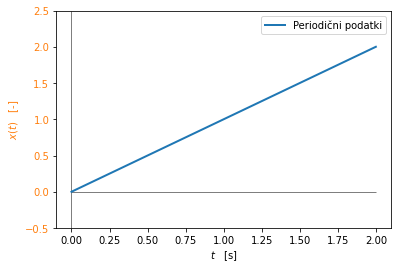

In [8]:
import numpy as np
import matplotlib.pyplot as plt


Tp = 2
t, dt = np.linspace(0,Tp,101, retstep=True)
x = t

fig, ax1 = plt.subplots()

ax1.set_xlabel('$t\\quad $[s]')
ax1.set_ylabel('$x(t)\quad$[-]', color='C1')
ax1.tick_params(axis='y', labelcolor='C1')
ax1.vlines(0, -0.5, 2.5, 'k', lw=0.5)
ax1.hlines(0, np.min(t), np.max(t), 'k', lw=0.5)
ax1.plot(t, x, label='Periodični podatki', c='C0', lw=2, alpha=1) 
ax1.legend(loc=1)
plt.ylim(-0.5,2.5)
plt.show()

In identificiramo kompleksne amplitude:

In [9]:
N = 10
X = np.zeros(2*N+1, dtype='complex')
n = np.arange(-N,N+1)
for i in n:
    X[i+N] = np.trapz(x*np.exp(-2j*np.pi*i*t/Tp), dx=dt)/Tp
X

array([-3.85108612e-16-0.03077684j, -3.83373888e-16-0.03442023j,
       -5.03069808e-16-0.03894743j, -2.68882139e-16-0.04473743j,
        1.52655666e-16-0.05242184j, -5.37764278e-17-0.06313752j,
       -4.16333634e-17-0.07915815j, -5.63785130e-17-0.10578895j,
       -6.24500451e-17-0.15894545j, -1.38777878e-17-0.31820516j,
        1.00000000e+00+0.j        , -1.38777878e-17+0.31820516j,
       -6.24500451e-17+0.15894545j, -5.63785130e-17+0.10578895j,
       -4.16333634e-17+0.07915815j, -5.37764278e-17+0.06313752j,
        1.52655666e-16+0.05242184j, -2.68882139e-16+0.04473743j,
       -5.03069808e-16+0.03894743j, -3.83373888e-16+0.03442023j,
       -3.85108612e-16+0.03077684j])

Na podlagi identificiranih kompleksnih amplitud, lahko definiramo kompleksno periodično funkcijo:

$$
x(t)=\sum_{n=-N}^{N}
X_n\,e^{\mathrm{i}\,2\pi\,n\,t/T_p},\qquad X_n=X_{-n}^*.
$$

Konkretna numerična koda je prikazana spodaj (pri tem smo uporabili novo numerično polje `x_r`, da ga ločimo od podatkov v obliki `x`):

In [10]:
x_r = np.zeros(len(t), 'complex')
for n in range(-N,N+1):
    x_r += X[N+n]*np.exp(2j*np.pi*n*t/Tp)
x_r = np.real(x_r) # teoretično pričakujemo samo realno rezultat (imaginarni del mora biti na nivoju numerične napake)


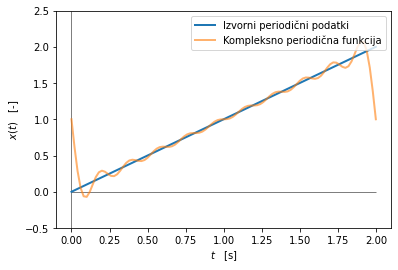

In [11]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('$t\\quad $[s]')
ax1.set_ylabel('$x(t)\quad$[-]')
ax1.vlines(0, -0.5, 2.5, 'k', lw=0.5)
ax1.hlines(0, np.min(t), np.max(t), 'k', lw=0.5)
ax1.plot(t, x, label='Izvorni periodični podatki', c='C0', lw=2, alpha=1) 
ax1.plot(t, x_r, label='Kompleksno periodična funkcija', c='C1', lw=2, alpha=.6) 
ax1.legend(loc=1)
plt.ylim(-0.5,2.5)
plt.show()

Opazimo, da identificirana kompleksno harmonska funkcija relativno dobro opiše izvorne periodične podatke. Če bi število harmonskih ($N$) komponent povečali, bi se identificirana funkcija izvorni bolje prilegala, vendar pa bi na mestu nezveznosti še vedno imeli odstopanje. Odstopanje na mestu nezveznosti je znano pod terminom **Gibbsov** fenomen. Resnici na ljubo je večina inženirskih aplikacij zveznih in zato ponavadi Gibbsov fenomen v praksi nima večjega pomena.

### Analitična obravnava periodične funkcije

Zgoraj smo Fourierovo vrsto izračunali na diskrenih podatkih in smo zato omejeni koliko harmonskih komponent lahko izračunamo (`N<len(t)/2`; zakaj je $N$ vezan na dolžino časovne vrste, bomo spoznali pozneje). Tukaj si bomo pogledali obravnavo zveznih sistemov in s pomočjo strojnega izpeljevanja določili Fourierovo vrsto. Kot primer periodične funkcija si bomo izbrali naraščajočo žago, ki bo proporcionalna s časom `t`, perioda bo `Tp`:

In [12]:
import sympy as sym
sym.init_printing()

t, Tp = sym.symbols('t, Tp', real=True)
x_r = sym.fourier_series(t, limits=(t, 0, Tp))

Vrsta sestavljena iz prvih 5 členov torej je:

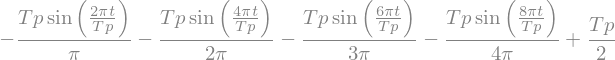

In [13]:
x_r.truncate(5)

Posamezni člen lahko izračunamo tudi sami:

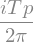

In [14]:
n = 1
X_n = sym.integrate(t*sym.exp(-sym.I*2*n*sym.pi*t/Tp), (t,0,Tp)).simplify()/Tp
X_n

Da dobimo harmonsko komponento, moramo `X_n` pomnožiti s pripadajočo pozitivno in negativno frekvenco:

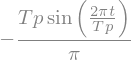

In [15]:
sym.simplify(X_n*sym.exp(sym.I*2*sym.pi*n*t/Tp)+sym.conjugate(X_n)*sym.exp(-sym.I*2*sym.pi*n*t/Tp))

In slika pri `Tp=2` in različnem številu členov v vrsti:

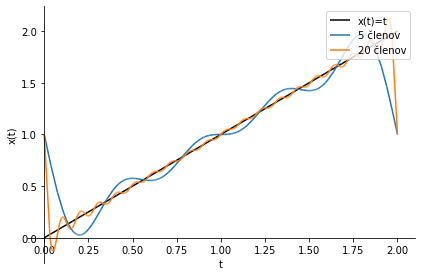

In [16]:
import sympy as sym
sym.init_printing()

t, Tp = sym.symbols('t, Tp')
x_r = sym.fourier_series(t, limits=(t, 0, Tp))

p0 = sym.plot(t, (t, 0 ,2), label='x(t)=t', show=False, line_color='k', ylabel='x(t)', legend=True)
p1 = sym.plot(x_r.truncate(5).subs(Tp,2), (t, 0 ,2), line_color='C0', label='5 členov',  show=False)
p2 = sym.plot(x_r.truncate(20).subs(Tp,2), (t, 0 ,2), line_color='C1', label='20 členov', show=False)
p0.append(p1[0])
p0.append(p2[0])
p0.show()

## Fourierove vrste in Diracova delta funkcija

### Diracova delta funkcija

Diracova delta funkcija (dejansko to posebna oblika funkcije, t.i. generalizirana funkcija) je definirana z:

$$
\delta(t)=0 \quad\textrm{ za } t\ne 0 \qquad\textrm{ in } \qquad \int_{-\infty}^{+\infty}\delta(t)\,\textrm{d}t=1.
$$

Ker je integral Diracove delta funkcije 1, se včasih imenuje tudi funkcija enotskega impulza, definirana tudi kot:

$$
\delta_{\varepsilon}=
\begin{cases}
\frac{1}{\varepsilon}&\textrm{ za }\quad -\frac{\varepsilon}{2}\le t\le+\frac{\varepsilon}{2}\\
0& \textrm{sicer}.
\end{cases}.
$$

Pri definiranju enotskega impulza si lahko pomagamo tudi z **koračno funkcijo** (**Heaviside funkcija**), ki je definirana kot:

$$
u(t)=
\begin{cases}
1&\textrm{ za }\quad t>0\\
0& \textrm{sicer}.
\end{cases}.
$$

Dve koračni funkciji ste definirani spodaj:

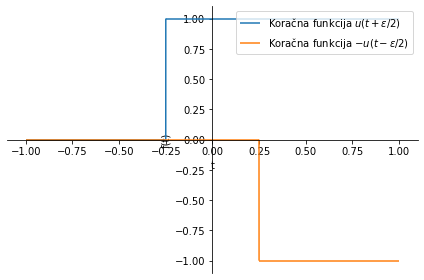

In [17]:
import sympy as sym
t, ε = sym.symbols(r't, \varepsilon')
unit_step = sym.Heaviside(t+ε/2)
p1 = sym.plot(unit_step.subs(ε, +0.5), (t,-1,1), line_color='C0', line_style=':', 
              show=False, label='Koračna funkcija $u(t+\\varepsilon/2)$') 
p2 = sym.plot(-unit_step.subs(ε, -0.5), (t,-1,1), line_color='C1', 
              show=False, label='Koračna funkcija $-u(t-\\varepsilon/2)$') 
p1.extend(p2)
p1.legend = True
p1.show()

Do enotskega impulza pridemo z uteženim seštevanjem dveh enotskih korakov:

$$
\delta_{\varepsilon}=\frac{1}{\varepsilon}\Big(u\big(t+\frac{\varepsilon}{2}\big)-u\big(t-\frac{\varepsilon}{2}\big)\Big)
$$

Poglejmo si kako koračno funkcijo pretvorimo v enotski impulz:

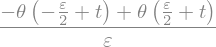

In [32]:
import sympy as sym
t, ε = sym.symbols(r't, \varepsilon')
podatki = {ε: 0.5}
unit_step = sym.Heaviside(t+ε/2) # tukaj moramo pravilno normirati (H0), glej help!
δ_ε = 1/ε * (unit_step-unit_step.subs(ε, -ε))
δ_ε

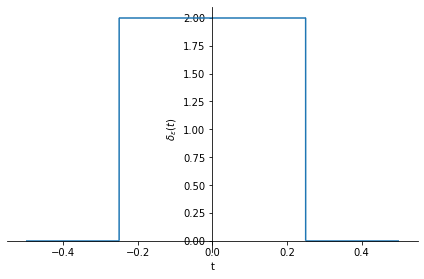

In [33]:
p1 = sym.plot(δ_ε.subs(podatki), (t,-.5,.5), line_color='C0', line_style=':', 
              ylabel='$\\delta_{\\varepsilon}(t)$')

in nato integriramo (rezultat je pričakovano enak 1; spremenite $\varepsilon$ v `podatki` zgoraj!):

In [34]:
sym.integrate(δ_ε.subs(podatki), (t, -sym.oo, sym.oo))

Med Dirakovo delta funkcijo in enotskim korakom velja tudi sledeča povezava ($u(t)$ je koračna funkcija):

$$
\delta(t)=\lim_{\varepsilon\rightarrow 0}\delta_{\varepsilon}(t)=\frac{\textrm{d}}{\textrm{d}t}u(t).
$$

Pozneje bomo potrebovali sledeče lastnosti Dirakove delta funkcije:

1. je soda: $\delta(t)=\delta(-t)$
1. *sejalna lastnost*, to pomeni, da integral navadne funkcije $x(t)$ in premaknjene Dirakove funkcije $\delta(t-a)$ vrne vrednost funkcije $x(a)$:$\int_{-\infty}^{+\infty}x(t)\,\delta(t-a)\,\textrm{d}t= x(a)$.
1. $\int_{-\infty}^{+\infty}e^{\pm\textrm{i}\,2\,\pi\,a\,t}\,\textrm{d}t= \delta(a)$ ali tudi: $\int_{-\infty}^{+\infty}e^{\pm\textrm{i}\,a\,t}\,\textrm{d}t= 2\,\pi\,\delta(a)$, za dokaz glejte {cite:t}`bendat_2011,shin2008` (str. 40).
1. $\delta(a\,t)=\delta(t)/|a|$.
1. $\int_{-\infty}^{+\infty}f(t)\,\delta^{(n)}(t)\,\textrm{d}t= (-1)^n\,f^{(n)}(a)$, kjer $n$ označuje odvod.

## Amplitudni in fazni spekter

Kompleksne amplitude $X_n$, ki jih obravnavamo pri Fourierovih vrstah, predstavljajo amplitudno in fazno informacijo o določeni harmonski komponenti. Poglejmo si primer periodičnega pravokotnega vala: slika spodaj. 

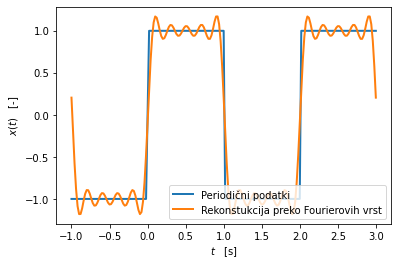

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# signal
Tp = 2
t, dt = np.linspace(-0.5*Tp,1.5*Tp,201, retstep=True)
x = np.sign(np.sin(2*np.pi*t/Tp))

# Fourierove vrste
N = 10
X = np.zeros(2*N+1, dtype='complex')
n = np.arange(-N,N+1)
#omejiti se moramo samo na eno periodo, sicer koeficienti niso pravilno izračunani
sel = np.logical_and(t>=0,t<=Tp) 
for i in n:
    X[i+N] = np.trapz(x[sel]*np.exp(-2j*np.pi*i*t[sel]/Tp), dx=dt)/Tp

# rekonstrukcija
x_r = np.zeros(len(t), 'complex')
for _ in range(-N,N+1):
    x_r += X[N+_]*np.exp(2j*np.pi*_*t/Tp)
x_r = np.real(x_r) 

fig, ax1 = plt.subplots()

ax1.set_xlabel('$t\\quad $[s]')
ax1.set_ylabel('$x(t)\quad$[-]')
ax1.tick_params(axis='y')
ax1.plot(t, x, label='Periodični podatki', c='C0', lw=2, alpha=1) 
ax1.plot(t, x_r, label='Rekonstukcija preko Fourierovih vrst', c='C1', lw=2, alpha=1) 
ax1.legend(loc=4)
plt.show()

Pri pripravi podatkov zgoraj smo izračunali kompleksne amplitude $X$:

In [112]:
X

array([ 0.005-4.16333634e-17j, -0.015+6.88404515e-02j,
        0.005-7.44196371e-16j, -0.015+8.94748566e-02j,
        0.005+8.23993651e-17j, -0.015+1.26275030e-01j,
        0.005+2.35055031e-16j, -0.015+2.11577900e-01j,
        0.005-2.99239800e-17j, -0.015+6.36410319e-01j,
        0.005+0.00000000e+00j, -0.015-6.36410319e-01j,
        0.005+2.99239800e-17j, -0.015-2.11577900e-01j,
        0.005-2.35055031e-16j, -0.015-1.26275030e-01j,
        0.005-8.23993651e-17j, -0.015-8.94748566e-02j,
        0.005+7.44196371e-16j, -0.015-6.88404515e-02j,
        0.005+4.16333634e-17j])

Kompleksne amplitude lahko prikažemo v grafični obliki. Če prikažemo amplitudo kompleksnega števila $|X|$, potem govorimo o amplitudnem spektru: za določeni večkratnih osnovne frekvence $1/T_p$ prikažemo vsebnost amplitude harmonske komponente. Podobno govorimo o faznem spektru, če prikažemo $\angle X_n$.

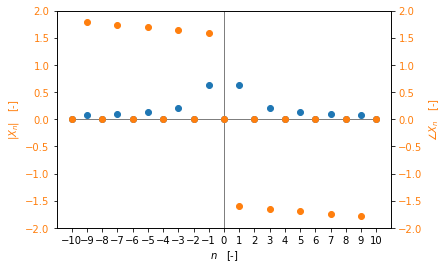

In [113]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots()

ax1.set_xlabel('$n\\quad $[-]')
ax1.set_ylabel('$|X_n|\\quad$[-]', color='C1')
ax1.tick_params(axis='y', labelcolor='C1')
ax1.vlines(0, -2, 2.5, 'k', lw=0.5)
ax1.hlines(0, np.min(n), np.max(n), 'k', lw=0.5)
ax1.plot(n, np.abs(X), 'o', label='Amplituda $X_n$', c='C0', lw=2, alpha=1) 
ax1.set_xticks(ticks=n)

ax2 = ax1.twinx() 
ax2.plot(n, np.angle(X), 'o', label='Faza $X_n$', c='C1', lw=2, alpha=1) 
ax2.set_ylabel('$\\angle X_n \quad$[-]', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')

#ax1.legend(loc=1)
ax1.set_ylim(-2.,2.)
ax2.set_ylim(-2.,2.)
plt.show()